In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
train_df = pd.concat([
    pd.read_csv("labeled_phone_ratings_sure.csv"),
    pd.read_csv("labelling_data_part1.csv"),
    pd.read_csv("labelling_data_part2.csv"),
])


In [4]:
train_df.shape

(2281, 7)

In [5]:
train_df.head()

,product_id,comment,comment_clean_stage1,comment_clean_stage2,rating,positive,negative
0,honor-x8b,"Đừng mua, ko có linh kiện.","đừng mua, không có linh kiện.",đừng mua không linh_kiện,1,0,1
1,honor-x8b,Mua online bên này báo ngoài ip ra thì hàng ko...,mua online bên này báo ngoài iphone ra thì hàn...,mua online bên báo iphone hàng không full box ...,2,0,1
2,honor-x8b,"Mạng yếu hay mất sóng, đổi máy khác được không","mạng yếu hay mất sóng, đổi máy khác được không?",mạng yếu hay mất sóng đổi máy được không,1,0,1
3,iphone-12,"Mua máy lướt được 2 hôm đã lỗi loa ngoài, lúc ...","mua máy lướt được hai hôm đã lỗi loa ngoài, lú...",mua máy lướt được hai hôm lỗi loa lúc bán nhân...,1,0,1
4,iphone-12,Mới mua mà dễ nóng quá. Khi sạc và nhất là bật...,mới mua mà dễ nóng quá. khi sạc và nhất là bật...,mới mua mà dễ nóng quá sạc nhất_là bật máy_ảnh...,2,0,1


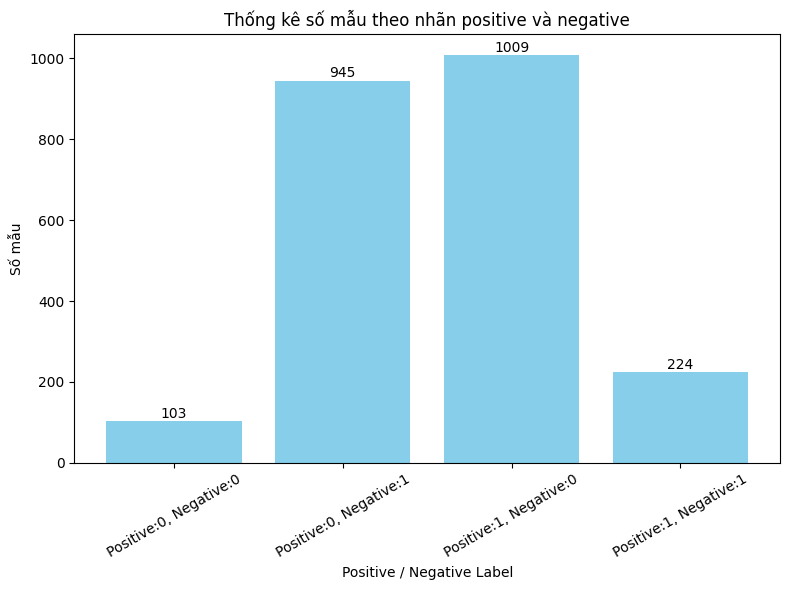

In [12]:
# Nhóm theo (positive, negative) và đếm số lượng
counts = train_df.groupby(['positive', 'negative']).size().reset_index(name='count')

# Tạo nhãn để hiển thị trên trục x
counts['label'] = counts.apply(lambda row: f"Positive:{row['positive']}, Negative:{row['negative']}", axis=1)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
bars = plt.bar(counts['label'], counts['count'], color='skyblue')

# Thêm số lượng trên đầu mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

# Thiết lập trục và tiêu đề
plt.xlabel('Positive / Negative Label')
plt.ylabel('Số mẫu')
plt.title('Thống kê số mẫu theo nhãn positive và negative')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [14]:
os.mkdir("../training_data")

In [16]:
train_df.to_csv("../training_data/train_data.csv", index=False)